# Monte Carlo Integration

This notebook demonstrates using Monte Carlo methods to calculate Pi and evaluate integrals numerically.

## Author
James Bott

## Calculating Pi

As an example of using a Monte-Carlo numerical method the following code calculates the value of Pi.


After 1000 trials, 779 samples fall within the circle.
The estimated value of Pi is: 3.116


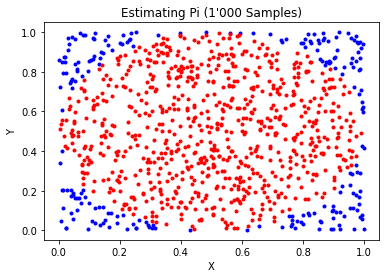

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Create 1000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(1000,2)))
df['Inside'] = df.apply(lambda row: ((row["X"] - 0.5)**2 + (row["Y"] - 0.5)**2) <= 0.5**2, axis=1)

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (1'000 Samples)")
plt.show()


Extending to 100`000 points:

After 100000 trials, 78760 samples fall within the circle.
The estimated value of Pi is: 3.1504


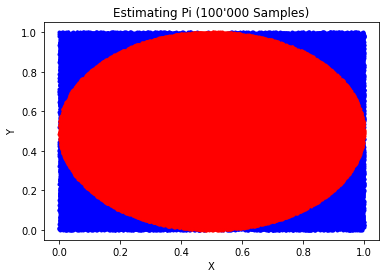

In [2]:
# Create 100`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(100000,2)))
df['Inside'] = df.apply(lambda row: ((row["X"] - 0.5)**2 + (row["Y"] - 0.5)**2) <= 0.5**2, axis=1)

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (100'000 Samples)")
plt.show()


We can further extend to 100'000'000 samples using vectroized operations in Pandas:

In [3]:
# Create 100`000`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(100000000,2)))

# Using vector operations to improve performance
df['Inside'] = (df['X'] * df['X'] - 2*0.5*df['X'] + 0.5*0.5 + df['Y'] * df['Y'] - 2*0.5*df['Y'] + 0.5**2) <= 0.5**2

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")


After 100000000 trials, 78545289 samples fall within the circle.
The estimated value of Pi is: 3.14181156


## Calculating the Integral of x^2

This first example calculates the definite integral of x^2 in the range [0, 100]. It is trivial to find the integral of x^2 analytically and this allows us to easily verify the result of the Monte-Carlo numerical method. 



In [5]:
# Domain over which to evaluate integral
domain = (0, 100)

# Function to integrate
def f(row):
    return row["X"]**2

# Definite integral of the function for comparison
def F(domain):
    return (domain[1]**3)/3 - (domain[0]**3)/3

# Create 10'000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X",), data = np.random.uniform(domain[0], domain[1], 10000))
df['Y'] = df.apply(f, axis=1)

# Find the mean value of the function
meanValue = df['Y'].sum() / df.shape[0]

# Find the integral calculated over the domain
calculatedIntegral = meanValue * (domain[1] - domain[0])

# Display results
print(f"The integral value using the Monte Carlo method: {calculatedIntegral}")
print(f"The integral value by the analytical solution: {F(domain)}")


The integral value using the Monte Carlo method: 331536.2452153791
The integral value by the analytical solution: 333333.3333333333
